## 📘 1. Carga y Exploración Inicial de Datos
Carga del archivo JSON: Utiliza pandas para leer el archivo y normalizar los datos si es necesario.

In [ ]:
import pandas as pd
import json

# Cargar el archivo JSON y normalizar
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

df = pd.json_normalize(data)

# Vista previa de los datos
print("Primeras filas del dataset:")
print(df.head())

# Tipos de datos y valores nulos
print("\nResumen de tipos de datos:")
df.info()

print("\nValores nulos por columna:")
print(df.isnull().sum())


Primeras filas del dataset:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  in

## 🧼 2. Manejo de Inconsistencias y Limpieza

In [ ]:
# Conversión de columnas numéricas
for col in ['account.Charges.Monthly', 'account.Charges.Total']:
    df[col] = df[col].replace(' ', pd.NA)  # Espacios vacíos a NA
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminamos filas con valores nulos críticos
df.dropna(subset=['Churn', 'account.Charges.Monthly', 'account.Charges.Total'], inplace=True)


## 🔧 3. Transformación y Estandarización de Datos

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']] = scaler.fit_transform(
    df[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']]
)

# Codificación de variables categóricas
categóricas_binarias = ['customer.gender', 'customer.Partner', 'customer.Dependents',
                         'phone.PhoneService', 'account.PaperlessBilling']

for col in categóricas_binarias:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# Codificación one-hot de variables categóricas con más de 2 valores
categóricas_multivalor = ['account.Contract', 'account.PaymentMethod', 'internet.InternetService']

df = pd.get_dummies(df, columns=categóricas_multivalor, drop_first=True)

## 🧮 4. Crear Columna de Cuentas Diarias

In [ ]:
df['DailyCharges'] = df['account.Charges.Total'] / (df['customer.tenure'] * 30)


## 📊 5. Análisis Descriptivo

In [ ]:
print("\nEstadísticas descriptivas:")
print(df.describe())



Estadísticas descriptivas:
       customer.gender  customer.SeniorCitizen  customer.Partner  \
count              0.0               7256.0000               0.0   
mean               NaN                  0.1629               NaN   
std                NaN                  0.3693               NaN   
min                NaN                  0.0000               NaN   
25%                NaN                  0.0000               NaN   
50%                NaN                  0.0000               NaN   
75%                NaN                  0.0000               NaN   
max                NaN                  1.0000               NaN   

       customer.Dependents  customer.tenure  phone.PhoneService  \
count                  0.0     7.256000e+03                 0.0   
mean                   NaN     3.525295e-17                 NaN   
std                    NaN     1.000069e+00                 NaN   
min                    NaN    -1.278509e+00                 NaN   
25%                    N

## 📉 6. Distribución de la Evasión (Churn)

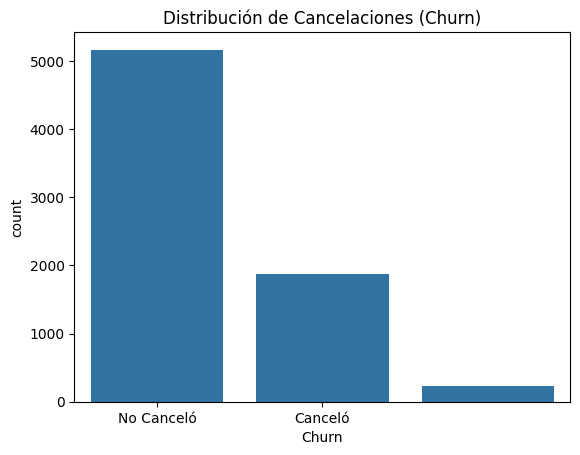

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Distribución de Cancelaciones (Churn)')
plt.xticks([0, 1], ['No Canceló', 'Canceló'])
plt.show()


## 📊 7. Recuento de Cancelaciones por Variables Categóricas


In [ ]:
# Variables categóricas tipo texto, excluyendo 'customerID' y 'Churn'
cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col not in ['customerID', 'Churn']]

for col in cat_cols:
    print(f"\nTasa de cancelación por categoría en '{col}':")
    cross_tab = pd.crosstab(df[col], df['Churn'], normalize='index')
    cross_tab.columns = ['No Canceló', 'Canceló']
    print(cross_tab)



Tasa de cancelación por categoría en 'phone.MultipleLines':


ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

# 📦 8. Comparación por Variables Numéricas

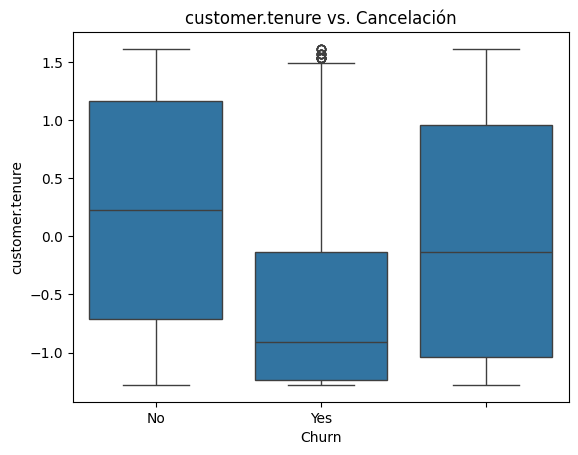

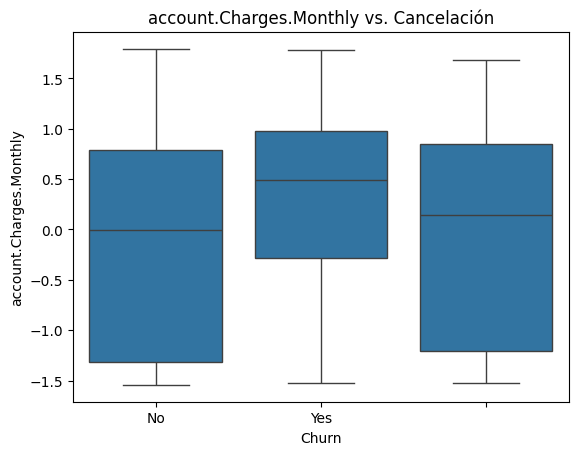

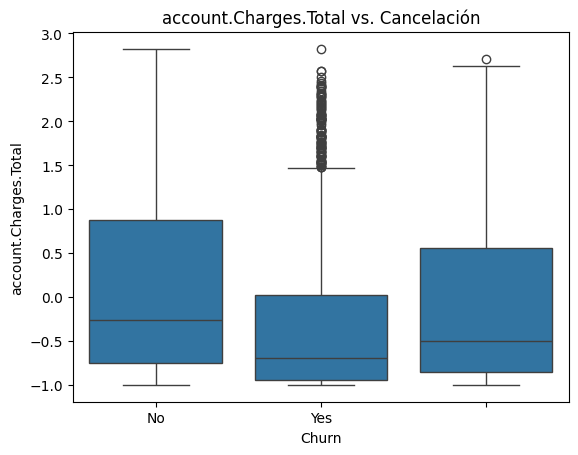

In [ ]:
numerical_features = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

for col in numerical_features:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs. Cancelación')
    plt.show()


## 🔗 09. Análisis de Correlación

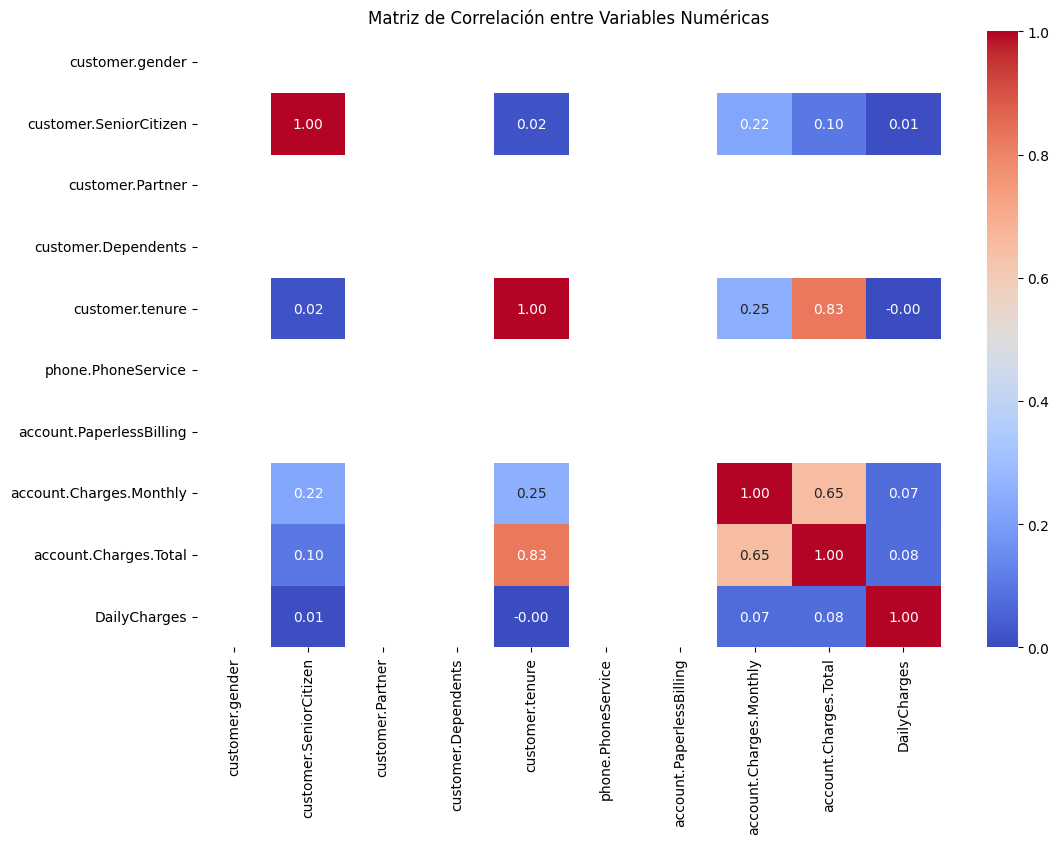

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()
